In [3]:

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [4]:
#first crop the viedos
#train test split
#preprocess the data
def extract_keypoints(results):
    pose = np.array([[res.x, res.y] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*2)

    lh = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*2)

    rh = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*2)

    return np.concatenate([pose, lh, rh])

def extract_video_keypoints(results):
    data = []
    for r in results:
        keypoints = extract_keypoints(r)
        data.append(keypoints)
    return np.array(data)

In [12]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


def detect_landmarks(image_, model):
    image_.flags.writeable = False
    image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
    results_ = model.process(image_)
    image_.flags.writeable = True
    image_ = cv2.cvtColor(image_, cv2.COLOR_RGB2BGR)
    return image_, results_

def draw_landmarks(image_, results_):
    mp_drawing.draw_landmarks(
            image_,
            results_.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))
    mp_drawing.draw_landmarks(
            image_,
            results_.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))
        
    mp_drawing.draw_landmarks(
            image_,
            results_.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))

    
def show_landmarks(original_image,results):
    fig = plt.figure(figsize=(12, 9)) 
    fig.add_subplot(1, 2, 1) 
    plt.title("Original Image")
    
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1, 2, 2) 
    plt.title("Keypoints")
    cropped_image_cp = original_image.copy()
    draw_landmarks(cropped_image_cp,results)
    plt.imshow( cv2.cvtColor(cropped_image_cp, cv2.COLOR_BGR2RGB))
    plt.show() 
    
def extract_video(path):
    cap = cv2.VideoCapture(path)
    original_frames =[]
    frames = []
    with mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            success, image = cap.read()
            
            if not success:
                break
            image, results = detect_landmarks(image, holistic) 
            frames.append(image)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()
    detection_results = pose_detection(frames) 
    return frames, detection_results

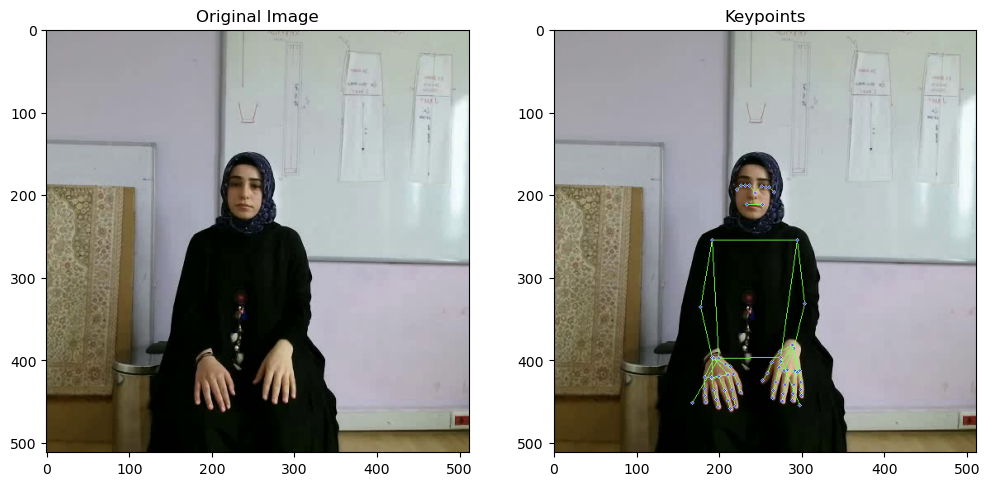

In [13]:
video_path = "../demodata/data"
frames, detection_results = extract_video(video_path+"/10/signer33_sample137_color.mp4")
show_landmarks(frames[0], detection_results[0])

In [17]:
video_path = "../demodata/data"
directories = os.listdir(video_path)
frames = []
data = []
labels = []
for d in directories:
    print("Executing {0} signs".format(d))
    files = os.listdir(video_path+"/"+d)
    for f in files:
        print("Executing the video named {0}".format(f))
        file_path = video_path + "/" + d + "/"+ f
        frames ,detection_results = extract_video(file_path)
        keypoints = extract_video_keypoints(detection_results)
        data.append(keypoints)
        labels.append(int(d)-1)


Executing 1 signs
Executing the video named signer0_sample109_color.mp4
Executing the video named signer0_sample1271_color.mp4
Executing the video named signer0_sample25_color.mp4
Executing the video named signer0_sample276_color.mp4
Executing the video named signer0_sample453_color.mp4
Executing the video named signer0_sample617_color.mp4
Executing the video named signer10_sample216_color.mp4
Executing the video named signer10_sample289_color.mp4
Executing the video named signer10_sample9_color.mp4
Executing the video named signer19_sample293_color.mp4
Executing the video named signer19_sample443_color.mp4
Executing the video named signer19_sample493_color.mp4
Executing the video named signer20_sample283_color.mp4
Executing the video named signer20_sample372_color.mp4
Executing the video named signer20_sample535_color.mp4
Executing the video named signer21_sample125_color.mp4
Executing the video named signer21_sample159_color.mp4
Executing the video named signer22_sample367_color.mp4


Executing the video named signer42_sample581_color.mp4
Executing the video named signer4_sample236_color.mp4
Executing the video named signer4_sample532_color.mp4
Executing the video named signer4_sample69_color.mp4
Executing the video named signer5_sample504_color.mp4
Executing the video named signer5_sample587_color.mp4
Executing the video named signer5_sample598_color.mp4
Executing the video named signer7_sample1549_color.mp4
Executing the video named signer7_sample1815_color.mp4
Executing the video named signer7_sample2333_color.mp4
Executing the video named signer8_sample1546_color.mp4
Executing the video named signer8_sample894_color.mp4
Executing the video named signer8_sample920_color.mp4
Executing the video named signer9_sample201_color.mp4
Executing the video named signer9_sample341_color.mp4
Executing the video named signer9_sample437_color.mp4
Executing 2 signs
Executing the video named signer0_sample1019_color.mp4
Executing the video named signer0_sample1223_color.mp4
Exec

Executing the video named signer37_sample365_color.mp4
Executing the video named signer37_sample51_color.mp4
Executing the video named signer38_sample362_color.mp4
Executing the video named signer38_sample387_color.mp4
Executing the video named signer38_sample633_color.mp4
Executing the video named signer3_sample128_color.mp4
Executing the video named signer3_sample173_color.mp4
Executing the video named signer3_sample415_color.mp4
Executing the video named signer40_sample3_color.mp4
Executing the video named signer40_sample412_color.mp4
Executing the video named signer40_sample43_color.mp4
Executing the video named signer41_sample266_color.mp4
Executing the video named signer41_sample620_color.mp4
Executing the video named signer41_sample629_color.mp4
Executing the video named signer42_sample179_color.mp4
Executing the video named signer42_sample37_color.mp4
Executing the video named signer42_sample636_color.mp4
Executing the video named signer4_sample115_color.mp4
Executing the video

Executing the video named signer29_sample138_color.mp4
Executing the video named signer29_sample247_color.mp4
Executing the video named signer29_sample36_color.mp4
Executing the video named signer2_sample1100_color.mp4
Executing the video named signer2_sample750_color.mp4
Executing the video named signer2_sample757_color.mp4
Executing the video named signer2_sample786_color.mp4
Executing the video named signer2_sample871_color.mp4
Executing the video named signer2_sample887_color.mp4
Executing the video named signer31_sample343_color.mp4
Executing the video named signer31_sample463_color.mp4
Executing the video named signer31_sample564_color.mp4
Executing the video named signer32_sample175_color.mp4
Executing the video named signer32_sample429_color.mp4
Executing the video named signer33_sample238_color.mp4
Executing the video named signer33_sample461_color.mp4
Executing the video named signer33_sample465_color.mp4
Executing the video named signer36_sample176_color.mp4
Executing the vi

Executing the video named signer20_sample441_color.mp4
Executing the video named signer21_sample119_color.mp4
Executing the video named signer21_sample25_color.mp4
Executing the video named signer22_sample115_color.mp4
Executing the video named signer22_sample46_color.mp4
Executing the video named signer23_sample226_color.mp4
Executing the video named signer23_sample246_color.mp4
Executing the video named signer23_sample408_color.mp4
Executing the video named signer24_sample160_color.mp4
Executing the video named signer24_sample199_color.mp4
Executing the video named signer24_sample225_color.mp4
Executing the video named signer26_sample377_color.mp4
Executing the video named signer26_sample482_color.mp4
Executing the video named signer26_sample516_color.mp4
Executing the video named signer28_sample268_color.mp4
Executing the video named signer28_sample501_color.mp4
Executing the video named signer29_sample208_color.mp4
Executing the video named signer29_sample319_color.mp4
Executing th

Executing the video named signer9_sample146_color.mp4
Executing the video named signer9_sample270_color.mp4
Executing the video named signer9_sample655_color.mp4
Executing 9 signs
Executing the video named signer0_sample1089_color.mp4
Executing the video named signer0_sample1114_color.mp4
Executing the video named signer0_sample1141_color.mp4
Executing the video named signer0_sample193_color.mp4
Executing the video named signer0_sample472_color.mp4
Executing the video named signer0_sample474_color.mp4
Executing the video named signer10_sample175_color.mp4
Executing the video named signer10_sample251_color.mp4
Executing the video named signer10_sample636_color.mp4
Executing the video named signer19_sample120_color.mp4
Executing the video named signer19_sample511_color.mp4
Executing the video named signer20_sample102_color.mp4
Executing the video named signer20_sample570_color.mp4
Executing the video named signer20_sample655_color.mp4
Executing the video named signer21_sample33_color.mp4

In [18]:
np.save("normaldata", np.array(data, dtype="object"))
np.save("normallabels", np.array(labels))

In [21]:
data[0].shape

(52, 150)

In [23]:
def optimize_keypoints_size(keypoints, size):
    if keypoints.shape[0] ==size:
        return keypoints
    
    if keypoints.shape[0] < size:
        missing_frames_size = size- keypoints.shape[0]
        original_indices = np.array([i for i in range(len(keypoints))])
        indices_to_duplicate = np.linspace(0, keypoints.shape[0] - 1, missing_frames_size, dtype=int)
        all_indices = np.sort(np.concatenate((original_indices, indices_to_duplicate), axis=0))
        return keypoints[all_indices]


    if keypoints.shape[0] > size:
        # Delete frames based on a pattern to match the desired size
        indices_to_keep = np.linspace(0, keypoints.shape[0] - 1, size, dtype=int)
        return keypoints[indices_to_keep]

def optimize_data(size):
    optimized_data = []
    for d in data:
        optimized_keypoints = optimize_keypoints_size(d, size)
        optimized_data.append(optimized_keypoints)
    return np.array(optimized_data)

In [29]:
size=60
optimized_data = optimize_data(size)
X = np.copy(optimized_data)
y = to_categorical(np.array(labels, dtype="int")).astype(int)

In [30]:
actions = ["acele", "acikmak", "afiyet olsun", "agabey", "agac", "agir", "aglamak", "aile", "akilli", "akilsiz"]
label_map = {label: num for num, label in enumerate(actions)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
def train_model(X_train, y_train, epoch_no, label_no):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,150)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(label_no, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.fit(X_train, y_train, epochs=epoch_no)
    model.summary()
    return model

model1 = train_model(X_train, y_train, 200, 10)

Epoch 1/200
21/21 [==============================] - 7s 63ms/step - loss: 2.3025 - categorical_accuracy: 0.0823
Epoch 2/200
21/21 [==============================] - 1s 65ms/step - loss: 2.3098 - categorical_accuracy: 0.0973
Epoch 3/200
21/21 [==============================] - 1s 66ms/step - loss: 2.3032 - categorical_accuracy: 0.1048
Epoch 4/200
21/21 [==============================] - 1s 65ms/step - loss: 2.3029 - categorical_accuracy: 0.0958
Epoch 5/200
21/21 [==============================] - 1s 63ms/step - loss: 2.3009 - categorical_accuracy: 0.0943
Epoch 6/200
21/21 [==============================] - 1s 64ms/step - loss: 2.3002 - categorical_accuracy: 0.0943
Epoch 7/200
21/21 [==============================] - 1s 61ms/step - loss: 2.3387 - categorical_accuracy: 0.1153
Epoch 8/200
21/21 [==============================] - 1s 62ms/step - loss: 2.3053 - categorical_accuracy: 0.0883
Epoch 9/200
21/21 [==============================] - 1s 63ms/step - loss: 2.3013 - categorical_accuracy:

21/21 [==============================] - 1s 66ms/step - loss: 1.7376 - categorical_accuracy: 0.2740
Epoch 74/200
21/21 [==============================] - 2s 72ms/step - loss: 2.2660 - categorical_accuracy: 0.1632
Epoch 75/200
21/21 [==============================] - 1s 65ms/step - loss: 2.3140 - categorical_accuracy: 0.0868
Epoch 76/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2993 - categorical_accuracy: 0.1168
Epoch 77/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2746 - categorical_accuracy: 0.1407
Epoch 78/200
21/21 [==============================] - 1s 62ms/step - loss: 2.3148 - categorical_accuracy: 0.1138
Epoch 79/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2840 - categorical_accuracy: 0.1377
Epoch 80/200
21/21 [==============================] - 1s 63ms/step - loss: 2.3010 - categorical_accuracy: 0.1123
Epoch 81/200
21/21 [==============================] - 1s 65ms/step - loss: 2.3065 - categorical_accuracy: 0.1

21/21 [==============================] - 1s 65ms/step - loss: 2.2608 - categorical_accuracy: 0.1557
Epoch 146/200
21/21 [==============================] - 1s 65ms/step - loss: 2.2596 - categorical_accuracy: 0.1153
Epoch 147/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2445 - categorical_accuracy: 0.1377
Epoch 148/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2701 - categorical_accuracy: 0.1287
Epoch 149/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2702 - categorical_accuracy: 0.1452
Epoch 150/200
21/21 [==============================] - 1s 64ms/step - loss: 2.2580 - categorical_accuracy: 0.1437
Epoch 151/200
21/21 [==============================] - 1s 66ms/step - loss: 2.2524 - categorical_accuracy: 0.1407
Epoch 152/200
21/21 [==============================] - 1s 66ms/step - loss: 2.2505 - categorical_accuracy: 0.1497
Epoch 153/200
21/21 [==============================] - 1s 63ms/step - loss: 2.2584 - categorical_accur

In [ ]:
def train_model2(X_train, y_train, epoch_no, label_no):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(60,150)))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(label_no, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.fit(X_train, y_train, epochs=epoch_no)
    model.summary()
    return model


model2 = train_model2(X_train, y_train, 200, 10)

Epoch 1/200
21/21 [==============================] - 6s 73ms/step - loss: 2.3172 - categorical_accuracy: 0.0853
Epoch 2/200
21/21 [==============================] - 2s 78ms/step - loss: 2.2900 - categorical_accuracy: 0.1048
Epoch 3/200
21/21 [==============================] - 2s 80ms/step - loss: 2.3009 - categorical_accuracy: 0.1467
Epoch 4/200
21/21 [==============================] - 1s 58ms/step - loss: 2.2480 - categorical_accuracy: 0.1422
Epoch 5/200
21/21 [==============================] - 1s 71ms/step - loss: 2.2967 - categorical_accuracy: 0.1272
Epoch 6/200
21/21 [==============================] - 1s 60ms/step - loss: 2.3099 - categorical_accuracy: 0.1482
Epoch 7/200
21/21 [==============================] - 1s 59ms/step - loss: 4.1719 - categorical_accuracy: 0.1497
Epoch 8/200
21/21 [==============================] - 1s 67ms/step - loss: 2.2577 - categorical_accuracy: 0.1617
Epoch 9/200
21/21 [==============================] - 1s 57ms/step - loss: 2.1686 - categorical_accuracy:

21/21 [==============================] - 1s 49ms/step - loss: 1.5731 - categorical_accuracy: 0.3683
Epoch 74/200
21/21 [==============================] - 1s 47ms/step - loss: 1.4052 - categorical_accuracy: 0.4222
Epoch 75/200
21/21 [==============================] - 1s 52ms/step - loss: 1.3478 - categorical_accuracy: 0.4581
Epoch 76/200
21/21 [==============================] - 1s 50ms/step - loss: 1.3986 - categorical_accuracy: 0.4341
Epoch 77/200
21/21 [==============================] - 1s 51ms/step - loss: 1.2860 - categorical_accuracy: 0.4596
Epoch 78/200
21/21 [==============================] - 1s 48ms/step - loss: 1.3151 - categorical_accuracy: 0.4416
Epoch 79/200
21/21 [==============================] - 1s 54ms/step - loss: 1.2490 - categorical_accuracy: 0.4850
Epoch 80/200
21/21 [==============================] - 1s 51ms/step - loss: 1.2525 - categorical_accuracy: 0.5015
Epoch 81/200
21/21 [==============================] - 1s 52ms/step - loss: 1.2591 - categorical_accuracy: 0.4

21/21 [==============================] - 1s 48ms/step - loss: 1.2638 - categorical_accuracy: 0.5135
Epoch 146/200
21/21 [==============================] - 1s 50ms/step - loss: 1.1841 - categorical_accuracy: 0.5165
Epoch 147/200
21/21 [==============================] - 1s 48ms/step - loss: 1.1444 - categorical_accuracy: 0.5045
Epoch 148/200
21/21 [==============================] - 1s 53ms/step - loss: 1.0775 - categorical_accuracy: 0.5509
Epoch 149/200
21/21 [==============================] - 1s 51ms/step - loss: 1.0208 - categorical_accuracy: 0.5943
Epoch 150/200
21/21 [==============================] - 1s 52ms/step - loss: 1.0226 - categorical_accuracy: 0.5524
Epoch 151/200
21/21 [==============================] - 1s 51ms/step - loss: 1.1793 - categorical_accuracy: 0.5045
Epoch 152/200
21/21 [==============================] - 1s 48ms/step - loss: 1.0625 - categorical_accuracy: 0.5823
Epoch 153/200
21/21 [==============================] - 1s 51ms/step - loss: 0.9954 - categorical_accur